In [1]:
import numpy as np
from time import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align
import MDAnalysis.analysis.hbonds
import matplotlib.pyplot as plt
import itertools as it

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:342: DeprecationWarning: This module is deprecated as of MDAnalysis version 1.0.It will be removed in MDAnalysis version 2.0Please use MDAnalysis.analysis.hydrogenbonds.hbond_analysis instead.
  warnings.warn(


In [2]:
# del_747_751_insP
# del_746_750
# del_747_753_insS

In [3]:
# input the trajectories and structure information

var_gro = '/Volumes/2KSPAT/del747_751_insP_expanded_shell_4us_MD/del747_751_insP_expanded_shell_4us_MD_trj/XTC/protein.gro' 
var_xtc = '/Volumes/2KSPAT/del747_751_insP_expanded_shell_4us_MD/del747_751_insP_expanded_shell_4us_MD_trj/XTC/protein_combined.trr' 
initial_ref = mda.Universe(var_gro)
u = mda.Universe(var_gro, var_xtc)



/Users/owner/opt/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [4]:
# compute the mean location of the residue i 
N_residue = 312
numerator = np.zeros((len(u.trajectory),N_residue,3))

np.zeros(len(u.trajectory))
for j in range(0,len(u.trajectory)):
    u.trajectory[j]

    align.alignto(u, initial_ref, select="protein and name CA", weights="mass")

    a2helixloopi   = u.select_atoms("protein and name CA")
    a2CAhelixloopi  = a2helixloopi.positions
    numerator[j] = a2CAhelixloopi  

# weighted mean locations of all the residues
num = np.sum(numerator,axis=0) / len(u.trajectory)

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [5]:
len(u.trajectory)

20003

In [6]:
# compute the delta_r's
nume = np.zeros((len(u.trajectory),N_residue,3))
for i in range(0,len(u.trajectory)):
    u.trajectory[i]
    align.alignto(u, initial_ref, select="protein and name CA", weights="mass")

    a2helixloopi   = u.select_atoms("protein and name CA")
    a2CAhelixloopi  = a2helixloopi.positions
    
    nume[i] = a2CAhelixloopi - num
    

In [ ]:
# calculate  correlation

C = np.zeros((N_residue, N_residue))
for i in range(0,N_residue):
    for j in range(0,N_residue):
        numer = np.zeros(len(u.trajectory))
        deno1 = np.zeros(len(u.trajectory))
        deno2 = np.zeros(len(u.trajectory))
        for k in range(0,len(u.trajectory)):
            numer[k] = np.dot(nume[k][i], nume[k][j]) 
            deno1[k] = np.dot(nume[k][i], nume[k][i]) 
            deno2[k] = np.dot(nume[k][j], nume[k][j]) 
                    
        C[i][j] = np.sum(numer) / ((np.sum(deno1)**(0.5)) * (np.sum(deno2)**(0.5)))

        


In [ ]:
# calculate  correlation



C = np.zeros((N_residue, N_residue))
for i in range(0,N_residue):
    for j in range(0,N_residue):
        numer = np.zeros(len(u.trajectory))
        deno1 = np.zeros(len(u.trajectory))
        deno2 = np.zeros(len(u.trajectory))
        for k in range(0,len(u.trajectory)):
            numer[k] = np.dot(nume[k][i], nume[k][j]) 
            deno1[k] = np.dot(nume[k][i], nume[k][i]) 
            deno2[k] = np.dot(nume[k][j], nume[k][j]) 
                    
        C[i][j] = np.sum(numer) / ((np.sum(deno1)**(0.5)) * (np.sum(deno2)**(0.5)))

        



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(C, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('EGFR-del747_751_insP correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del747_751_insP_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_751_insP_corr.txt',C)
np.savetxt('EGFR_del747_751_insP_corr.txt',C)

In [ ]:
Dee = np.loadtxt('EGFR_del747_751_insP_corr.txt')
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(Dee, cmap='jet', interpolation='nearest',origin='lower',extent = [695 , 1010, 695 , 1010])
plt.colorbar()
plt.title('EGFR-del747_751_insP')
plt.clim(-1,1)
plt.savefig('EGFR_del747_751_insP_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()


In [ ]:
Dee = np.loadtxt('EGFR_del747_750_insP_corr.txt')

In [ ]:
# Save the correlation matrix
C.shape

In [ ]:
pwd

In [ ]:
a = np.array([1,2,3])
h = np.array([-1,7,8])

In [ ]:
x = np.dot(a,h)

In [ ]:
x = -4

In [ ]:
x**(0.5)

In [ ]:
Dee = np.loadtxt('EGFR_del747_750_insP_corr.txt')


In [ ]:
Dee.shape

In [ ]:
beta_1_start = 712
beta_1_end = 720

p_loop_start = 719
p_loop_end = 724


beta_2_start = 724
beta_2_end = 731

beta_3_start = 740
beta_3_end = 747

alpha_C_start = 756
alpha_C_end = 767

beta_4_start = 777
beta_4_end = 782

beta_5_start = 786
beta_5_end = 791

alpha_D_start = 798
alpha_D_end = 806

alpha_E_start = 811
alpha_E_end = 831


cat_loop_start = 831
cat_loop_end = 842


beta_6_start = 843
beta_6_end = 847

beta_7_start = 850
beta_7_end = 863

act_loop_start = 855
act_loop_end = 876

alpha_F_start = 883
alpha_F_end = 888

alpha_G_start = 893
alpha_G_end = 909

alpha_H_start = 923
alpha_H_end = 929

# 921 to 929 - alpha H 

alpha_I_start = 941
alpha_I_end = 950

alpha_J_start = 973
alpha_J_end = 985

# 965 to 973 - alpha J 

In [ ]:
a = np.array([-1, 2, -3,-9,8])

np.average(np.abs(a[1:3]))
#np.abs(a[1:3])

## WT Coarse graining

In [2]:
Dee = np.loadtxt('EGFR_WT_corr.txt')

res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]

reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
        
        

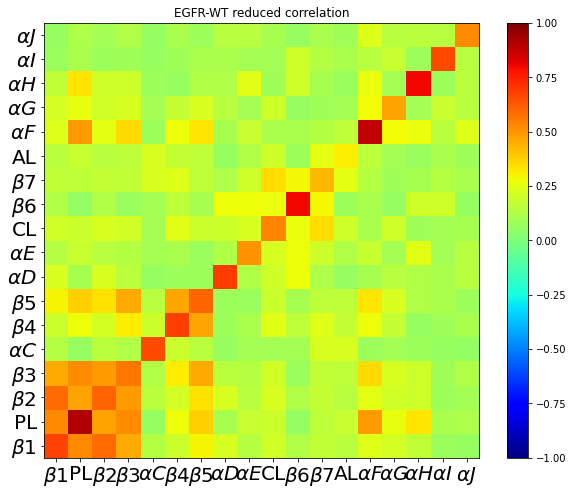

In [3]:
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-WT reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_WT_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_WT_reduced_corr.txt',reduced_corr)

In [ ]:
norm_reduced_corr

## L747P Coarse graining

In [4]:
Dee = np.loadtxt('EGFR_L747P_corr.txt')

res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]

reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
                

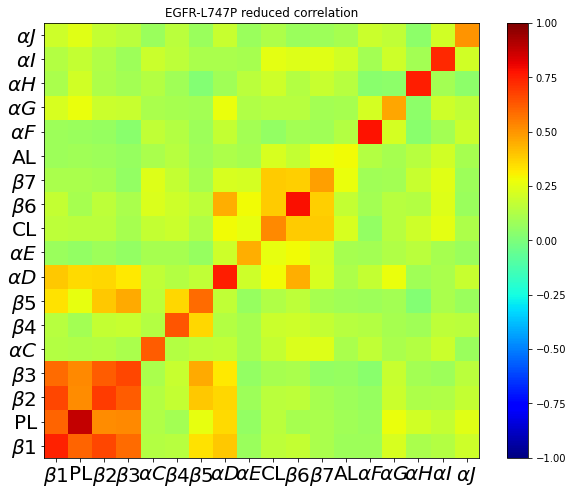

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-L747P reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_L747P_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_L747P_reduced_corr.txt',reduced_corr)

## del747_749 Coarse graining

In [6]:
Dee = np.loadtxt('EGFR_del747_749_corr.txt')

res_lst_start = [712,719, 724, 740, 753, 774, 783, 795, 808, 828, 840, 847, 852, 880, 890, 920, 938, 970]
res_lst_end = [720, 724, 731, 746, 764, 779, 788,803, 828,839, 844, 860, 873, 885, 906, 926, 947, 982]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
                

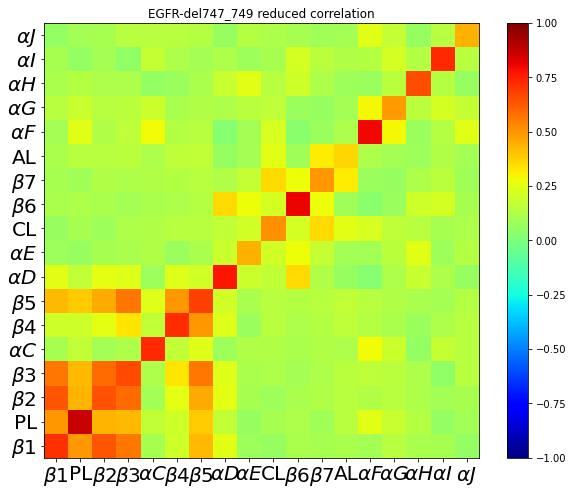

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_749 reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del747_749_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_749_reduced_corr.txt',reduced_corr)

## del747_750_ins_P Coarse graining

In [8]:
Dee = np.loadtxt('EGFR_del747_750_insP_corr.txt')

res_lst_start = [712,719, 724, 740, 753, 774, 783, 795, 808, 828, 840, 847, 852, 880, 890, 920, 938, 970]
res_lst_end = [720, 724, 731, 746, 764, 779, 788,803, 828,839, 844, 860, 873, 885, 906, 926, 947, 982]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
                

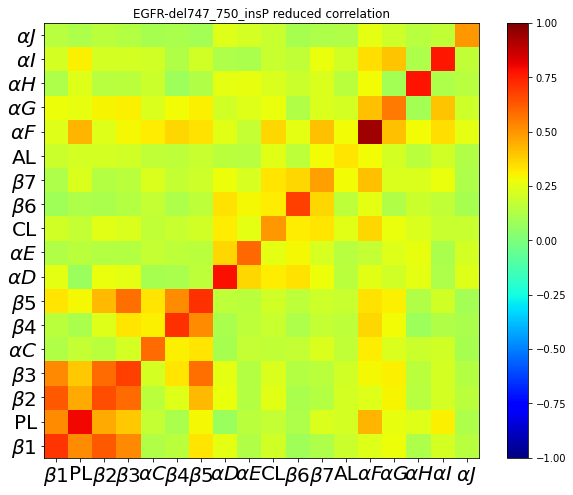

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_750_insP reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del747_750_insP_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_750_insP_reduced_corr.txt',reduced_corr)

## del746_751_ins_A Coarse graining

In [10]:
Dee = np.loadtxt('EGFR_del746_751_insA_corr.txt')

res_lst_start = [712,719, 724, 740, 751, 772, 781, 793, 806, 826, 838, 845, 850, 878, 888, 918, 936, 968]
res_lst_end = [720, 724, 731, 745, 762, 777, 786,801, 826,837, 842, 858, 871, 883, 904, 924, 945, 980]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

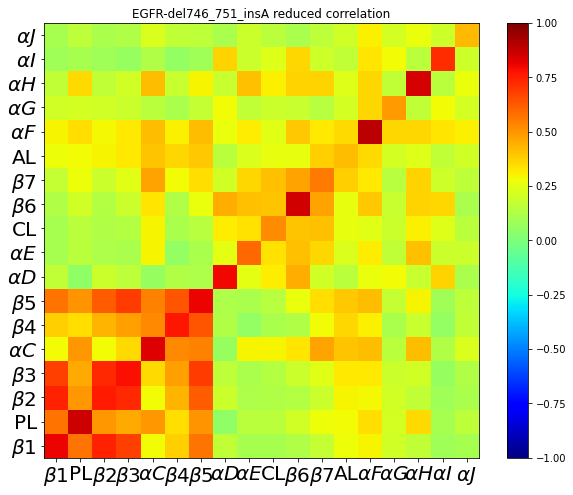

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del746_751_insA reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del746_751_insA_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del746_751_insA_reduced_corr.txt',reduced_corr)

## del752_759 Coarse graining

In [12]:
Dee = np.loadtxt('EGFR_del752_759_corr.txt')

res_lst_start = [712,719, 724, 740, 752, 769, 778, 790, 803, 823, 835, 842, 847, 875, 885, 915, 933, 965]
res_lst_end = [720, 724, 731, 747, 759, 774, 783,798, 823,834, 839, 855, 868, 880, 901, 921, 942, 977]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

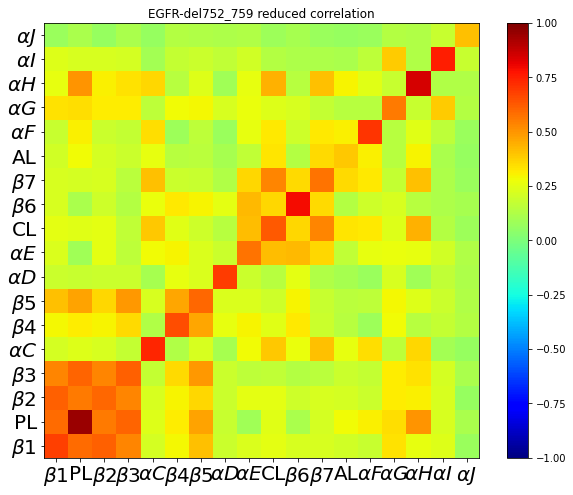

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del752_759 reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del752_759_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del752_759_reduced_corr.txt',reduced_corr)

## del747_753_insS Coarse graining

In [14]:
Dee = np.loadtxt('EGFR_del747_753_insS_corr.txt')

res_lst_start = [712,719, 724, 740, 750, 771, 780, 792, 805, 829, 837, 844, 849, 877, 887, 917, 935, 967]
res_lst_end = [720, 724, 731, 746, 761, 776, 785,800, 825,836, 841, 857, 870, 882, 903, 923, 944, 979]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 865, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

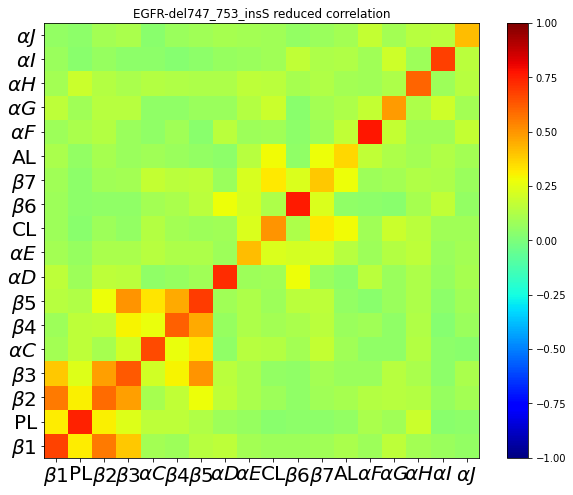

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_753_insS reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del747_753_insS_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_753_insS_reduced_corr.txt',reduced_corr)

## del746_750 Coarse graining

In [16]:
Dee = np.loadtxt('EGFR_del746_750_corr.txt')

res_lst_start = [712,719, 724, 740, 751, 772, 781, 793, 806, 826, 838, 845, 850, 878, 888, 918, 936, 968]
res_lst_end = [720, 724, 731, 745, 762, 777, 786,801, 826,837, 842, 858, 871, 883, 904, 924, 945, 980]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

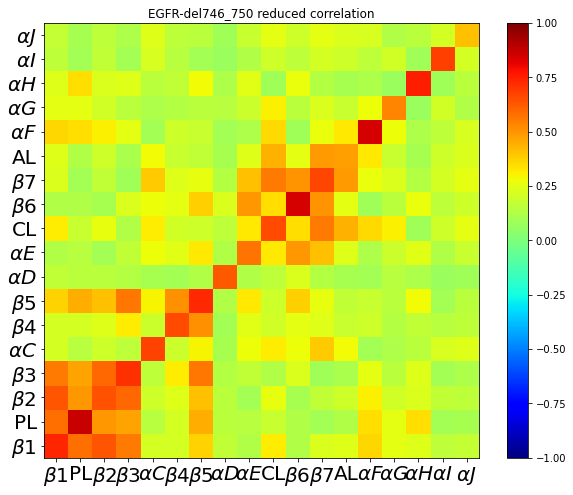

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del746_750 reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del746_750_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del746_750_reduced_corr.txt',reduced_corr)

## del747_751_insP Coarse graining

In [18]:
Dee = np.loadtxt('EGFR_del747_751_insP_corr.txt')

res_lst_start = [712,719, 724, 740, 752, 773, 782, 794, 807, 827, 839, 846, 851, 879, 889, 919, 937, 969]
res_lst_end = [720, 724, 731, 746, 763, 778, 787,802, 827,838, 843, 859, 872, 884, 905, 925, 946, 981]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

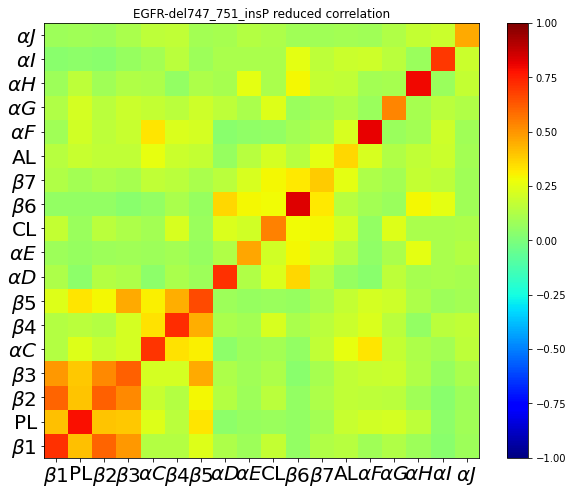

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_751_insP reduced correlation')
plt.clim(-1,1)
plt.savefig('EGFR_del747_751_insP_reduced_correlation.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_751_insP_reduced_corr.txt',reduced_corr)

In [ ]:
cutoff = [0, 0.1, 0.15, 0.2, 0.25, 0.3]
for i in range(0,len(cutoff)):
    plt.figure(figsize=(15, 10))


    masked_array = np.ma.masked_where(np.abs(reduced_corr) < cutoff[i] , reduced_corr)

    im = plt.imshow(masked_array, cmap='jet', interpolation='nearest',origin='lower')
    cmap.set_bad(color='white')
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    
    text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
    x_values = np.arange(0, len(text_values) + 1, 1)
    plt.xticks(x_values, text_values,fontsize=20)
    plt.yticks(x_values, text_values,fontsize=20)
    
    plt.title('EGFR-WT reduced correlation cutoff={}'.format(cutoff[i]), fontsize=25)
    plt.clim(-1,1)
    plt.savefig('EGFR_WT_reduced_correlation_filtered_cutoff_{}.png'.format(cutoff[i]), bbox_inches = 'tight', dpi = 300)
    plt.show()



### Hierarchical Cluster

In [ ]:
D_wt = np.loadtxt('EGFR_WT_reduced_corr.txt')
D_l747p = np.loadtxt('EGFR_L747P_reduced_corr.txt')
D_del747_750_insP = np.loadtxt('EGFR_del747_750_insP_reduced_corr.txt')

D_del746_751_insA = np.loadtxt('EGFR_del746_751_insA_reduced_corr.txt')
D_del747_749 = np.loadtxt('EGFR_del747_749_reduced_corr.txt')
D_del752_759 = np.loadtxt('EGFR_del752_759_reduced_corr.txt')


D_del747_753_insS = np.loadtxt('EGFR_del747_753_insS_reduced_corr.txt')
D_del746_750 = np.loadtxt('EGFR_del746_750_reduced_corr.txt')
D_del747_751_insP = np.loadtxt('EGFR_del747_751_insP_reduced_corr.txt')


lst = []
lst.append(D_wt)
lst.append(D_l747p)
lst.append(D_del747_749)


lst.append(D_del747_750_insP)
lst.append(D_del746_751_insA)

lst.append(D_del752_759)
lst.append(D_del747_753_insS)
lst.append(D_del746_750)

lst.append(D_del747_751_insP)


#WT
#L747P
#Del747_749

#del747_750_insP
#del746_751_insA

#Del752_759
#del747_753_insS
#del746_750

#del747_751_insP

In [ ]:
#WT
#L747P
#del747_750_insP
#del747_753_insS
#del746_750


In [ ]:
dist = np.zeros((9,9))
for i in range(0,9):
    for j in range(0,9):
        dist[i][j] = np.sum((lst[i] - lst[j])**2)
    
    
dist    


In [ ]:

#WT
#L747P
#Del747_749

#del747_750_insP
#del746_751_insA

#Del752_759
#del747_753_insS
#del746_750

#del747_751_insP

In [ ]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt


mat =  dist
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["WT", "L747P", "del747_749", "del747_750>P", "del746_751>A","del752_759", "del747_753>S","del746_750","del747_751>P" ],leaf_font_size=14, leaf_rotation=90)
plt.title("Exon 19 mutation hierarchical clustering (using non normalized matrix and non absolute)")
plt.ylabel("Distance", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Volumes/2KSPAT/EGFR_cluster_non_normal_non_absolute.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [ ]:
#WT
#L747P
#del747_750_insP
#del747_753_insS
#del746_750



In [ ]:
#import numpy as np

#from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.spatial.distance import squareform

#import matplotlib.pyplot as plt


#mat =  dist
#dists = squareform(mat)
#linkage_matrix = linkage(dists, "single")
#dendrogram(linkage_matrix, labels=["WT", "L747P", "del747_750>P", "del747_753>S","del746_750" ],leaf_font_size=14, leaf_rotation=90)
#plt.title("Exon 19 mutation hierarchical clustering (using normalized matrix and non absolute)")
#plt.ylabel("Distance", fontsize=15)
#plt.yticks(fontsize=15)
#plt.savefig('EGFR_cluster_normal_non_absolute.png', bbox_inches = 'tight', dpi = 300)
#plt.show()

## COVARIANCE MATRICES

In [ ]:
# input the trajectories and structure information

var_gro = '/Volumes/2KSPAT/del747_751_insP_expanded_shell_4us_MD/del747_751_insP_expanded_shell_4us_MD_trj/XTC/protein.gro' 
var_xtc = '/Volumes/2KSPAT/del747_751_insP_expanded_shell_4us_MD/del747_751_insP_expanded_shell_4us_MD_trj/XTC/protein_combined.trr' 
initial_ref = mda.Universe(var_gro)
u = mda.Universe(var_gro, var_xtc)




In [ ]:
# compute the mean location of the residue i 
N_residue = 312
numerator = np.zeros((len(u.trajectory),N_residue,3))

np.zeros(len(u.trajectory))
for j in range(0,len(u.trajectory)):
    u.trajectory[j]

    align.alignto(u, initial_ref, select="protein and name CA", weights="mass")

    a2helixloopi   = u.select_atoms("protein and name CA")
    a2CAhelixloopi  = a2helixloopi.positions
    numerator[j] = a2CAhelixloopi  

# weighted mean locations of all the residues
num = np.sum(numerator,axis=0) / len(u.trajectory)

In [ ]:
# compute the delta_r's
nume = np.zeros((len(u.trajectory),N_residue,3))
for i in range(0,len(u.trajectory)):
    u.trajectory[i]
    align.alignto(u, initial_ref, select="protein and name CA", weights="mass")

    a2helixloopi   = u.select_atoms("protein and name CA")
    a2CAhelixloopi  = a2helixloopi.positions
    
    nume[i] = a2CAhelixloopi - num
    

In [ ]:
# calculate  correlation
C = np.loadtxt('EGFR_del747_751_insP_corr.txt')
C_cov = np.zeros((N_residue, N_residue))
ele = np.zeros(N_residue)

for i in range(0,N_residue):

    deno1 = np.zeros(len(u.trajectory))
    for k in range(0,len(u.trajectory)):
        deno1[k] = np.dot(nume[k][i], nume[k][i]) 
    ele[i] = np.sum(deno1)
        
for i in range(0,N_residue): 
    for j in range(0,N_residue):
        C_cov[i][j] = C[i][j] * (ele[i]**(0.5)) * (ele[j]**(0.5)) * (1/len(u.trajectory))

        
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(C_cov, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('EGFR-del747_751_insP covariance')
plt.clim(C_cov.min(),C_cov.max())
plt.savefig('EGFR_del747_751_insP_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_751_insP_cov.txt',C_cov)
np.savetxt('EGFR_del747_751_insP_cov.txt',C_cov)


In [ ]:
Dee = np.loadtxt('EGFR_del747_751_insP_cov.txt')
Dee

In [ ]:
Dee = np.loadtxt('EGFR_del747_751_insP_cov.txt')
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(Dee, cmap='jet', interpolation='nearest',origin='lower',extent = [695 , 1010, 695 , 1010])
plt.colorbar()
plt.title('EGFR-del747_751_insP')
plt.clim(C_cov.min(),C_cov.max())
plt.savefig('EGFR_del747_751_insP_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()



## WT coarsegraining

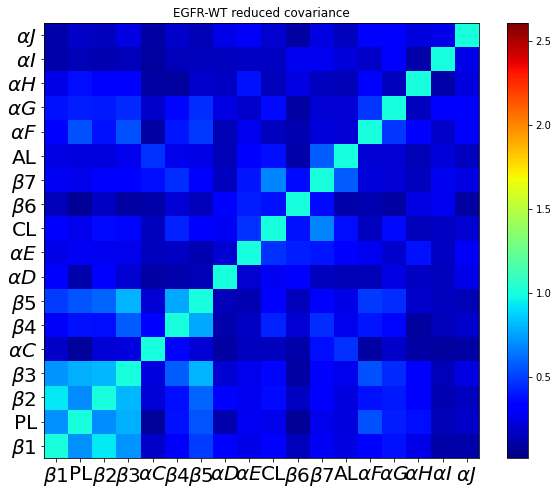

In [2]:
Dee = np.loadtxt('EGFR_WT_cov.txt')

res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]

reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(norm_reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-WT reduced covariance')
plt.clim(reduced_corr.min(),reduced_corr.max())
plt.savefig('EGFR_WT_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_WT_reduced_cov.txt',reduced_corr)
        

## L747P Coarsegraining

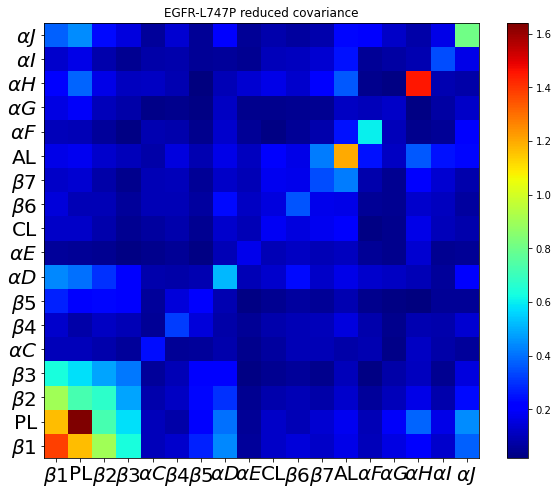

In [3]:
Dee = np.loadtxt('EGFR_L747P_cov.txt')

res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]

reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-L747P reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_L747P_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_L747P_reduced_cov.txt',reduced_corr)

## del747_749 Coarsegraining

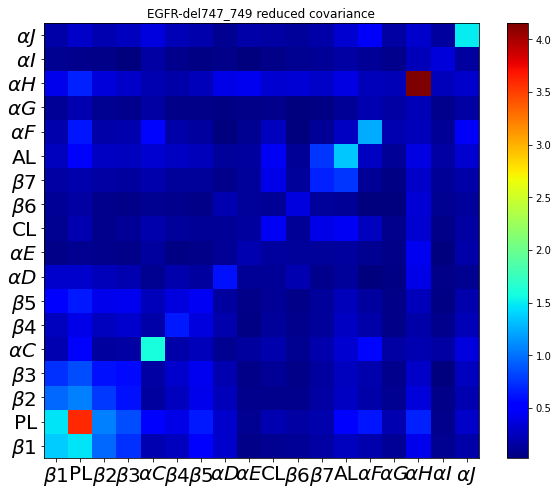

In [4]:
Dee = np.loadtxt('EGFR_del747_749_cov.txt')

res_lst_start = [712,719, 724, 740, 753, 774, 783, 795, 808, 828, 840, 847, 852, 880, 890, 920, 938, 970]
res_lst_end = [720, 724, 731, 746, 764, 779, 788,803, 828,839, 844, 860, 873, 885, 906, 926, 947, 982]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_749 reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del747_749_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_749_reduced_cov.txt',reduced_corr)

## del747_750_insP Coarsegraining

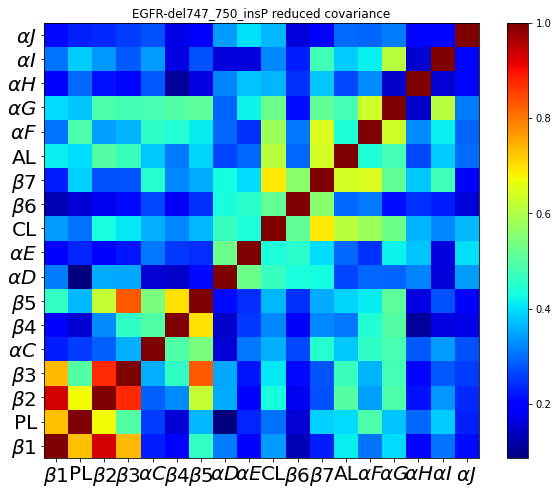

In [5]:
Dee = np.loadtxt('EGFR_del747_750_insP_cov.txt')

res_lst_start = [712,719, 724, 740, 753, 774, 783, 795, 808, 828, 840, 847, 852, 880, 890, 920, 938, 970]
res_lst_end = [720, 724, 731, 746, 764, 779, 788,803, 828,839, 844, 860, 873, 885, 906, 926, 947, 982]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(norm_reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_750_insP reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del747_750_insP_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_750_insP_reduced_cov.txt',reduced_corr)

## del746_751_insA Coarsegraining

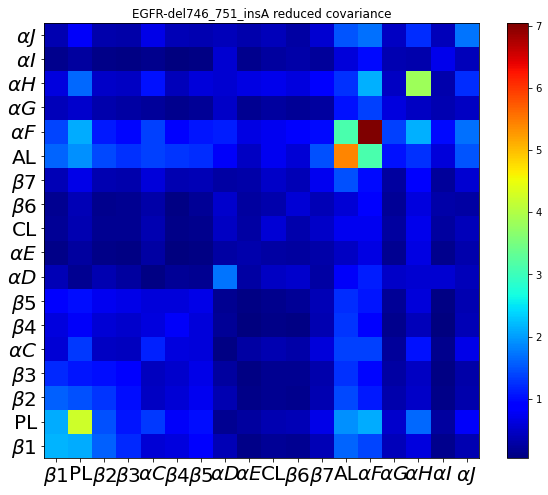

In [6]:
Dee = np.loadtxt('EGFR_del746_751_insA_cov.txt')

res_lst_start = [712,719, 724, 740, 751, 772, 781, 793, 806, 826, 838, 845, 850, 878, 888, 918, 936, 968]
res_lst_end = [720, 724, 731, 745, 762, 777, 786,801, 826,837, 842, 858, 871, 883, 904, 924, 945, 980]

#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del746_751_insA reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del746_751_insA_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del746_751_insA_reduced_cov.txt',reduced_corr)

## del752_759 Coarsegraining

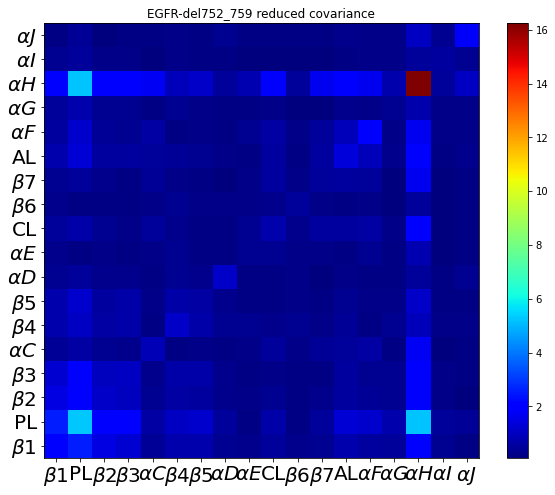

In [7]:
Dee = np.loadtxt('EGFR_del752_759_cov.txt')

res_lst_start = [712,719, 724, 740, 752, 769, 778, 790, 803, 823, 835, 842, 847, 875, 885, 915, 933, 965]
res_lst_end = [720, 724, 731, 747, 759, 774, 783,798, 823,834, 839, 855, 868, 880, 901, 921, 942, 977]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))

# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del752_759 reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del752_759_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del752_759_reduced_cov.txt',reduced_corr)

## del747_753_insS Coarsegraining

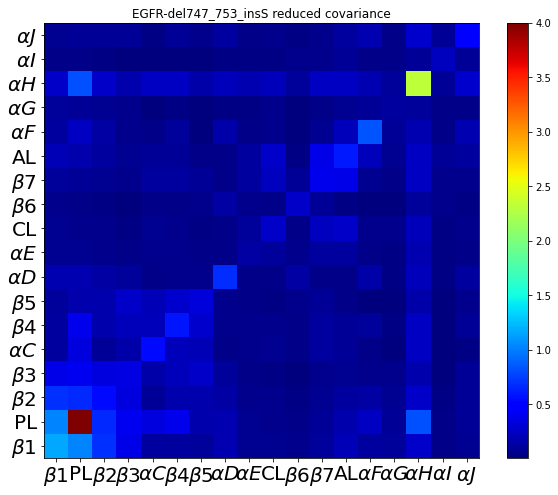

In [8]:
Dee = np.loadtxt('EGFR_del747_753_insS_cov.txt')

res_lst_start = [712,719, 724, 740, 750, 771, 780, 792, 805, 825, 837, 844, 849, 877, 887, 917, 935, 967]
res_lst_end = [720, 724, 731, 746, 761, 776, 785,800, 825,836, 841, 857, 870, 882, 903, 923, 944, 979]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
            
            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_753_insS reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del747_753_insS_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_753_insS_reduced_cov.txt',reduced_corr)

## del746_750  Coarsegraining

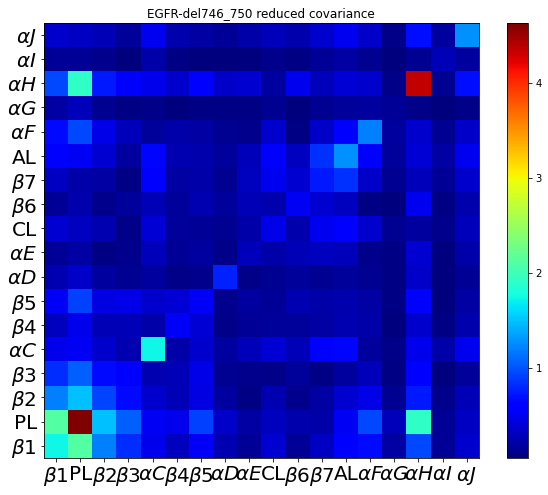

In [9]:
Dee = np.loadtxt('EGFR_del746_750_cov.txt')

res_lst_start = [712,719, 724, 740, 751, 772, 781, 793, 806, 826, 838, 845, 850, 878, 888, 918, 936, 968]
res_lst_end = [720, 724, 731, 745, 762, 777, 786,801, 826,837, 842, 858, 871, 883, 904, 924, 945, 980]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del746_750 reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del746_750_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del746_750_reduced_cov.txt',reduced_corr)

## del747_751_insP Coarsegraining

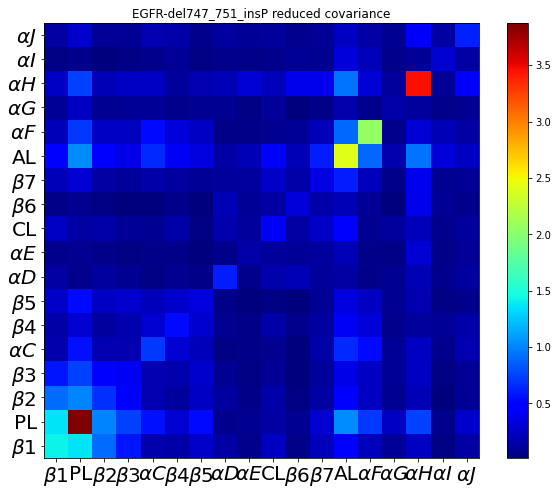

In [10]:
Dee = np.loadtxt('EGFR_del747_751_insP_cov.txt')

res_lst_start = [712,719, 724, 740, 752, 773, 782, 794, 807, 827, 839, 846, 851, 879, 889, 919, 937, 969]
res_lst_end = [720, 724, 731, 746, 763, 778, 787,802, 827,838, 843, 859, 872, 884, 905, 925, 946, 981]


#res_lst_start = [712,719, 724, 740, 756, 777, 786, 798, 811, 831, 843, 850, 855, 883, 893, 923, 941, 973]
#res_lst_end = [720, 724, 731, 747, 767, 782, 791,806, 831,842, 847, 863, 876, 888, 909, 929, 950, 985]


reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(np.abs(Dee[res_lst_start[i]-695+1:res_lst_end[i]-695+1, res_lst_start[j]-695+1:res_lst_end[j]-695+1]))
        
# normalization
norm_reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(reduced_corr)):
    for j in range(0,len(reduced_corr)):
        norm_reduced_corr[i][j] = reduced_corr[i][j] / ((reduced_corr[i][i]**0.5) * (reduced_corr[j][j]**0.5))
        if reduced_corr[i][j] <=0 and i==j:
            print('there is something negative at {} row and {} column'.format(i,j))
            
            
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 6$',r'$\beta 7$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$', r'$\alpha J$'  ]
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('EGFR-del747_751_insP reduced covariance')
#plt.clim(-1,1)
plt.savefig('EGFR_del747_751_insP_reduced_covariance.png', bbox_inches = 'tight', dpi = 300)
plt.show()
np.savetxt('EGFR_del747_751_insP_reduced_cov.txt',reduced_corr)

## Hierarchical cluster covariance

In [2]:
D_wt_1 = np.loadtxt('EGFR_WT_reduced_cov.txt')
D_l747p_1 = np.loadtxt('EGFR_L747P_reduced_cov.txt')
D_del747_750_insP_1 = np.loadtxt('EGFR_del747_750_insP_reduced_cov.txt')

D_del746_751_insA_1 = np.loadtxt('EGFR_del746_751_insA_reduced_cov.txt')
D_del747_749_1 = np.loadtxt('EGFR_del747_749_reduced_cov.txt')
D_del752_759_1 = np.loadtxt('EGFR_del752_759_reduced_cov.txt')


D_del747_753_insS_1 = np.loadtxt('EGFR_del747_753_insS_reduced_cov.txt')
D_del746_750_1 = np.loadtxt('EGFR_del746_750_reduced_cov.txt')
D_del747_751_insP_1 = np.loadtxt('EGFR_del747_751_insP_reduced_cov.txt')


lst = []
lst.append(D_wt_1)
lst.append(D_l747p_1)
lst.append(D_del747_749_1)


lst.append(D_del747_750_insP_1)
lst.append(D_del746_751_insA_1)

lst.append(D_del752_759_1)
lst.append(D_del747_753_insS_1)
lst.append(D_del746_750_1)

lst.append(D_del747_751_insP_1)


#WT
#L747P
#Del747_749

#del747_750_insP
#del746_751_insA

#Del752_759
#del747_753_insS
#del746_750

#del747_751_insP
#lst

In [12]:
dist = np.zeros((9,9))
for i in range(0,9):
    for j in range(0,9):
        dist[i][j] = np.sum((lst[i] - lst[j])**2)
    
    
dist    


array([[  0.        ,   8.18446364,  14.20866076,  96.93779696,
        180.3332724 , 356.66937353,   8.3101014 ,  30.59264623,
         12.98652793],
       [  8.18446364,   0.        ,  21.34943253, 124.72876954,
        215.56025613, 386.45577538,  10.19567055,  46.43509967,
         22.97708685],
       [ 14.20866076,  21.34943253,   0.        ,  72.17110906,
        153.97438626, 264.38972688,  13.55922416,  12.34149379,
          8.77925826],
       [ 96.93779696, 124.72876954,  72.17110906,   0.        ,
         97.79183002, 262.54612407,  99.20790596,  48.65302713,
         67.07586939],
       [180.3332724 , 215.56025613, 153.97438626,  97.79183002,
          0.        , 303.34689858, 206.55488998, 131.87558853,
        129.78553122],
       [356.66937353, 386.45577538, 264.38972688, 262.54612407,
        303.34689858,   0.        , 339.81629362, 218.13661706,
        283.46487157],
       [  8.3101014 ,  10.19567055,  13.55922416,  99.20790596,
        206.55488998, 339.8162

In [ ]:

#WT
#L747P
#Del747_749

#del747_750_insP
#del746_751_insA

#Del752_759
#del747_753_insS
#del746_750

#del747_751_insP



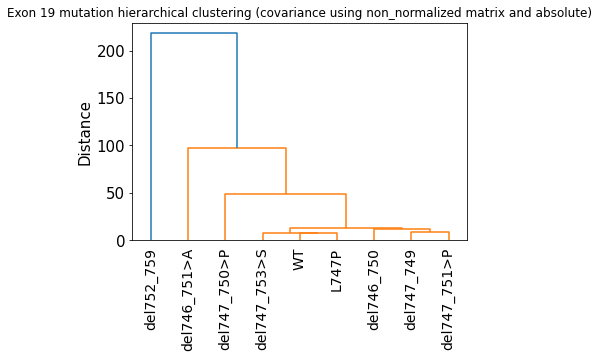

In [13]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt


mat =  dist
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=["WT", "L747P", "del747_749", "del747_750>P", "del746_751>A","del752_759", "del747_753>S","del746_750","del747_751>P" ],leaf_font_size=14, leaf_rotation=90)
plt.title("Exon 19 mutation hierarchical clustering (covariance using non_normalized matrix and absolute)")
plt.ylabel("Distance", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/Volumes/2KSPAT/EGFR_cov_cluster_non_normal_absolute.png', bbox_inches = 'tight', dpi = 300)
plt.show()